# Метод k-средних (K-Means clustering)

---

**Источники:**

[Метод k-средних](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_k-%D1%81%D1%80%D0%B5%D0%B4%D0%BD%D0%B8%D1%85)

[k-means clustering](https://en.wikipedia.org/wiki/K-means_clustering)

[K-means Clustering: Algorithm, Applications, Evaluation Methods, and Drawbacks](https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a)

[K Means](https://stanford.edu/~cpiech/cs221/handouts/kmeans.html)

[Метод k-средних (K-means)](https://wiki.loginom.ru/articles/k-means.html)

---

## Подготовка окружения

In [1]:
# ВНИМАНИЕ: необходимо удостовериться, что виртуальная среда выбрана правильно!

# Для MacOS/Ubuntu
# !which pip

# Для Windows
# !where pip

In [2]:
# !conda install matplotlib numpy scikit-learn seaborn -y

In [3]:
# !conda install -c conda-forge umap-learn -y

In [4]:
import numpy as np

np.__version__

'1.20.2'

In [5]:
import pandas as pd

pd.__version__

'1.2.4'

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

matplotlib.__version__

'3.3.4'

In [7]:
import seaborn as sns

sns.__version__

'0.11.1'

In [8]:
import umap
from umap import UMAP

umap.__version__

'0.5.1'

In [9]:
import sklearn

from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

from sklearn.preprocessing import QuantileTransformer

sklearn.__version__

'0.24.2'

## Описание

**Метод k-средних (англ. k-means)** — наиболее **простой**, но в то же время достаточно **неточный** метод кластеризации в классической реализации. 

Идея метода **k-средних** была одновременно сформулирована Гуго Штейнгаузом и Стюартом Ллойдом в 1957 г. Сам термин «k-средних» был впервые введен Дж. Маккуинном в 1967 г.

**k-means** разбивает множество элементов векторного пространства на **заранее известное число кластеров `k`**. 

Действие алгоритма таково, что он стремится **минимизировать среднеквадратичное отклонение на точках каждого кластера**.

### Инерция (Inertia)

Алгоритм группирует данные, пытаясь разделить выборки на `k` групп с равной дисперсией (variance), минимизируя критерий, известный как **инерция (inertia)** или **сумма квадратов внутри кластера**.

Алгоритм K-средних нацелен на выбор центроидов, которые минимизируют **инерцию (inertia)** или критерий суммы квадратов внутри кластера.

**Инерцию можно определить как меру того, насколько кластеры внутренне связаны.**

**Недостатки инерции:**

- Предполагается, что **кластеры выпуклые и изотропные, что не всегда так**. 

- **Плохо реагирует** на удлиненные кластеры или **кластеры неправильной формы**.

- Это не нормализованная метрика: 
    - Просто знаем, что** более низкие значения лучше, а ноль - оптимально**. 
    - Но в очень многомерных пространствах **евклидовы расстояния имеют тенденцию становиться раздутыми** (это пример так называемого "проклятия размерности"). 
    - Выполнение алгоритма уменьшения размерности, такого как анализ главных компонент **(PCA) перед кластеризацией k-средних, может облегчить** эту проблему и ускорить вычисления.
    
<img src="images/kmeans_drawbacks.png" width=700/>

### Алгоритм

<img src="images/kmeans_algorithm.gif" width=500/>

Алгоритм представляет собой итерационную процедуру, в которой выполняются следующие шаги:

1. Выбирается число кластеров `k`.

1. Из исходного множества данных случайным образом выбираются `k` наблюдений, которые будут служить начальными *центрами кластеров*.

1. Для каждого наблюдения исходного множества определяется ближайший к нему *центр кластера* (обычно, расстояния измеряются в метрике Евклида). При этом записи, "притянутые" определенным *центром*, образуют начальные кластеры.

1. Вычисляются *центроиды* — центры тяжести кластеров. Каждый центроид — это вектор, элементы которого представляют собой средние значения соответствующих признаков, вычисленные по всем записям кластера.

1. *Центр кластера* смещается в его *центроид*, после чего центроид становится центром нового кластера.

1. 3-й и 4-й шаги итеративно повторяются. Очевидно, что на каждой итерации происходит изменение границ кластеров и смещение их центров. В результате минимизируется расстояние между элементами внутри кластеров и увеличиваются междукластерные расстояния.

Остановка алгоритма производится тогда, когда границы кластеров и расположения центроидов не перестанут изменяться от итерации к итерации, т.е. на каждой итерации в каждом кластере будет оставаться один и тот же набор наблюдений.

На практике алгоритм обычно находит набор стабильных кластеров за несколько десятков итераций.

<img src="images/kmeans.gif" width=700/>


### Преимущества

- Скорость.

- Простота реализации.

### Недостатки

- Необходимо заранее знать количество кластеров.

- Очень чувствителен к выбору начальных центров кластеров. Результат зависит от выбора исходных центров кластеров, их оптимальный выбор неизвестен.

- Не справляется с задачей, когда объект принадлежит к разным кластерам в равной степени или не принадлежит ни одному.

### Похожие алгоритмы

Существуют методы кластеризации, которые можно рассматривать как **происходящие от k-средних**.

Например, в методе **k-медиан (k-medians)** для вычисления центроидов используется не среднее, а **медиана**, что делает алгоритм более устойчивым к аномальным значениям в данных.

Алгоритм **g-средних (от gaussian)** строит кластеры, распределение данных в которых стремится к **нормальному (гауссовскому)** и снимает неопределенность выбора начальных кластеров.

Алгоритм **C-средних** использует элементы **нечеткой логики**, учитывая при вычислении центроидов не только расстояния, но и степень принадлежности наблюдения к множеству объектов в кластере.

Также известен **алгоритм Ллойда**, который в качестве начального разбиения использует не множества векторов, а области векторного пространства.

Широко известна и используется нейросетевая реализация K-means — сети векторного квантования сигналов (одна из версий **нейронных сетей Кохонена**).

Существует расширение **k-means++**, которое направлено на оптимальный выбор начальных значений центров кластеров.

## Загрузка данных

[Источник (custDatasets)](https://www.kaggle.com/gangliu/custdatasets).

In [10]:
df = pd.read_csv('./../../data/Cust_Segmentation.csv', index_col=0)
df

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
Customer Id,,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2
...,...,...,...,...,...,...,...,...,...
846,27,1,5,26,0.548,1.220,NaN,NBA007,6.8
847,28,2,7,34,0.359,2.021,0.0,NBA002,7.0
848,25,4,0,18,2.802,3.210,1.0,NBA001,33.4


## Анализ данных

См. лекцию [02_pca](../../08_modeling_ml_demensionality_reduction/lectures/02_pca.ipynb)

## Подготовка данных

In [11]:
df['Defaulted'].fillna(0, inplace=True)
df['Defaulted'] = df['Defaulted'].astype(int)
df['Defaulted'].isna().sum()

0

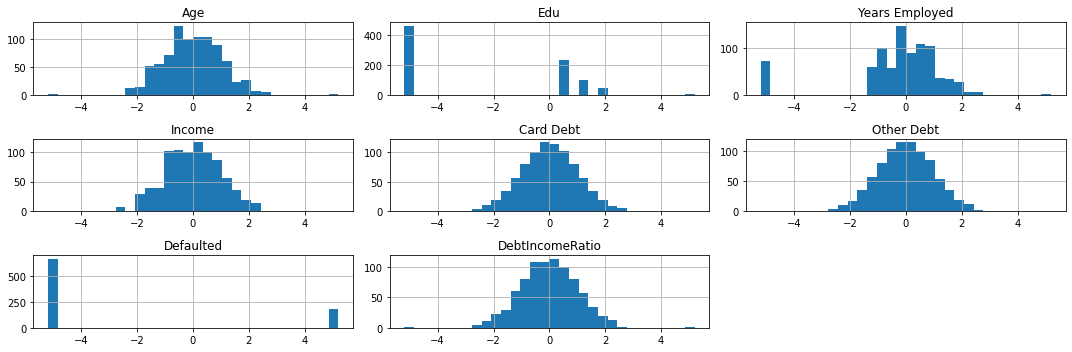

In [12]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
norm_trans = QuantileTransformer(output_distribution='normal', n_quantiles=100)
df_norm = pd.DataFrame(norm_trans.fit_transform(df[num_cols]), columns=num_cols)
df_norm.hist(bins=30, figsize=(15, 5))
plt.tight_layout()

## Выбор `n_clusters`

"Метод локтя" (Elbow Method For Optimal k)

In [13]:
inertias = []
Ks = range(1,15)
for k in Ks:
    km = KMeans(n_clusters=k)
    km = km.fit(df_norm)
    inertias.append(km.inertia_)

inertias

[30419.901950691034,
 14448.97777338662,
 8368.43826225836,
 6674.5426315941895,
 5817.130402247017,
 5170.967099003625,
 4616.147625502832,
 4181.325035442312,
 3843.75870942575,
 3653.9803477029527,
 3395.343941848184,
 3234.282208970939,
 3009.3714463799156,
 2877.4818033464935]

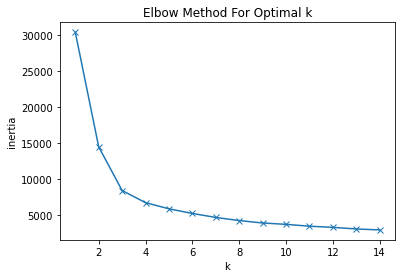

In [14]:
plt.plot(Ks, inertias, 'x-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

## 3-D PCA

In [15]:
pca_3 = PCA(n_components=3)
df_pca_3 = pd.DataFrame(pca_3.fit_transform(df_norm))

In [44]:
%matplotlib widget
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig, azim=-155, elev=45)


ax.scatter(df_pca_3[0], df_pca_3[1], df_pca_3[2], 
           alpha=0.3)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [17]:
%matplotlib inline

## 3-D UMAP

In [18]:
umap_3 = UMAP(n_components=3)
df_umap_3 = pd.DataFrame(umap_3.fit_transform(df_norm))

In [45]:
%matplotlib widget

from mpl_toolkits.mplot3d.axes3d import Axes3D    
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig, azim=25, elev=35)

ax.scatter(df_umap_3[0], df_umap_3[1], df_umap_3[2], alpha=0.3)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [20]:
%matplotlib inline

## Построение модели (4 кластера)

In [21]:
k_means_4 = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)
k_means_4.fit(df_norm)

n_clusters_4 = k_means_4.n_clusters

labels_4 = k_means_4.labels_
labels_4

array([0, 2, 1, 0, 2, 2, 0, 0, 2, 0, 1, 0, 2, 2, 1, 2, 2, 0, 2, 2, 0, 0,
       1, 2, 0, 2, 2, 2, 0, 0, 0, 0, 1, 0, 2, 0, 1, 3, 2, 0, 3, 0, 0, 0,
       2, 0, 2, 2, 2, 0, 2, 2, 3, 2, 1, 3, 3, 0, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 3, 2, 3, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 1, 0, 2, 0, 2, 0, 0,
       1, 1, 0, 0, 3, 3, 0, 0, 2, 2, 1, 0, 3, 0, 2, 3, 1, 2, 2, 2, 0, 0,
       2, 0, 2, 3, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       0, 0, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 3, 0, 2, 1, 0, 0, 2, 2, 1, 2,
       0, 2, 2, 2, 1, 1, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 1, 2, 3,
       2, 2, 1, 2, 1, 0, 2, 3, 1, 0, 2, 2, 2, 0, 2, 2, 0, 1, 0, 0, 0, 2,
       1, 0, 2, 0, 1, 2, 2, 3, 0, 2, 2, 1, 2, 2, 2, 0, 2, 3, 1, 0, 2, 2,
       1, 0, 0, 0, 2, 2, 0, 2, 0, 3, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 1, 2, 3, 2, 2, 2, 0, 0, 1,
       2, 3, 2, 0, 2, 2, 1, 2, 2, 0, 0, 3, 1, 1, 2, 0, 2, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 0, 2, 3, 0, 2, 1, 2, 1, 2, 0,

## Анализ результатов (4 кластера)

### 3-D PCA

In [46]:
%matplotlib widget
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig, azim=-155, elev=45)


ax.scatter(df_pca_3[0], df_pca_3[1], df_pca_3[2], 
           c=labels_4, 
           alpha=0.3)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [23]:
%matplotlib inline

### 3-D UMAP

In [24]:
%matplotlib widget

from mpl_toolkits.mplot3d.axes3d import Axes3D    
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig, azim=142, elev=35)

ax.scatter(df_umap_3[0], df_umap_3[1], df_umap_3[2], 
           c=labels_4, 
           alpha=0.3)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [25]:
%matplotlib inline

### Анализ "представителей" кластеров

In [26]:
df["Cluster_4"] = labels_4
df

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio,Cluster_4
Customer Id,,,,,,,,,,
1,41,2,6,19,0.124,1.073,0,NBA001,6.3,0
2,47,1,26,100,4.582,8.218,0,NBA021,12.8,2
3,33,2,10,57,6.111,5.802,1,NBA013,20.9,1
4,29,2,4,19,0.681,0.516,0,NBA009,6.3,0
5,47,1,31,253,9.308,8.908,0,NBA008,7.2,2
...,...,...,...,...,...,...,...,...,...,...
846,27,1,5,26,0.548,1.220,0,NBA007,6.8,2
847,28,2,7,34,0.359,2.021,0,NBA002,7.0,0
848,25,4,0,18,2.802,3.210,1,NBA001,33.4,1


In [27]:
df.groupby('Cluster_4').mean().round(2)

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Cluster_4,,,,,,,,
0,35.62,2.53,8.54,55.71,1.47,3.17,0.0,8.69
1,32.66,2.59,4.62,47.66,2.42,4.29,1.0,14.09
2,35.55,1.00,10.19,42.52,1.25,2.64,0.0,9.10
3,33.47,1.00,6.03,32.72,2.43,3.30,1.0,15.57


In [28]:
clusters = {}

for c in range(n_clusters_4):
    clusters[c] = df[df.Cluster_4 == c]
    display(clusters[c])
    display(clusters[c].describe())
    print('\n', '=' * 100, '\n')

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio,Cluster_4
Customer Id,,,,,,,,,,
1,41,2,6,19,0.124,1.073,0,NBA001,6.3,0
4,29,2,4,19,0.681,0.516,0,NBA009,6.3,0
7,38,2,4,56,0.442,0.454,0,NBA013,1.6,0
8,42,3,0,64,0.279,3.945,0,NBA009,6.6,0
10,47,3,23,115,0.653,3.947,0,NBA011,4.0,0
...,...,...,...,...,...,...,...,...,...,...
837,23,2,3,24,0.552,0.960,0,NBA004,6.3,0
841,38,3,13,25,0.343,1.082,0,NBA018,5.7,0
842,29,3,7,63,0.572,2.893,0,NBA001,5.5,0


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Cluster_4
count,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.0,286.000000,286.0
mean,35.622378,2.534965,8.541958,55.706294,1.472444,3.165122,0.0,8.685315,0.0
std,8.071004,0.761232,6.441368,40.263576,1.704603,3.176850,0.0,5.656841,0.0
min,20.000000,2.000000,0.000000,14.000000,0.015000,0.053000,0.0,0.100000,0.0
25%,29.000000,2.000000,3.000000,28.000000,0.403500,1.021000,0.0,4.400000,0.0
50%,35.000000,2.000000,8.000000,43.000000,0.891500,2.067000,0.0,7.550000,0.0
75%,41.000000,3.000000,12.000000,68.750000,1.839750,4.272250,0.0,12.175000,0.0
max,54.000000,5.000000,31.000000,266.000000,9.877000,18.269000,0.0,32.400000,0.0


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio,Cluster_4
Customer Id,,,,,,,,,,
3,33,2,10,57,6.111,5.802,1,NBA013,20.9,1
11,44,3,8,88,0.285,5.083,1,NBA010,6.1,1
15,28,3,2,20,0.233,1.647,1,NBA000,9.4,1
23,28,3,6,47,5.574,3.732,1,NBA008,19.8,1
33,23,2,0,42,1.019,0.619,1,NBA001,3.9,1
...,...,...,...,...,...,...,...,...,...,...
797,25,4,0,24,1.597,1.307,1,NBA006,12.1,1
817,36,2,6,27,0.262,0.980,1,NBA015,4.6,1
824,27,4,0,25,1.419,1.756,1,NBA000,12.7,1


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Cluster_4
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.0,104.000000,104.0
mean,32.663462,2.586538,4.615385,47.663462,2.422279,4.287221,1.0,14.088462,1.0
std,7.836448,0.758263,4.653650,52.537109,2.908140,4.689026,0.0,7.407701,0.0
min,21.000000,2.000000,0.000000,15.000000,0.118000,0.161000,1.0,0.900000,1.0
25%,27.000000,2.000000,1.000000,24.000000,0.480750,1.459000,1.0,8.475000,1.0
50%,31.000000,2.000000,3.000000,33.000000,1.446000,2.711000,1.0,13.450000,1.0
75%,39.000000,3.000000,6.250000,52.750000,3.059000,5.071750,1.0,18.475000,1.0
max,53.000000,5.000000,18.000000,446.000000,16.031000,27.034000,1.0,36.600000,1.0


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio,Cluster_4
Customer Id,,,,,,,,,,
2,47,1,26,100,4.582,8.218,0,NBA021,12.8,2
5,47,1,31,253,9.308,8.908,0,NBA008,7.2,2
6,40,1,23,81,0.998,7.831,0,NBA016,10.9,2
9,26,1,5,18,0.575,2.215,0,NBA006,15.5,2
13,24,1,7,18,0.526,0.643,0,NBA000,6.5,2
...,...,...,...,...,...,...,...,...,...,...
843,32,1,14,36,0.273,0.591,0,NBA000,2.4,2
845,41,1,7,43,0.694,1.198,0,NBA011,4.4,2
846,27,1,5,26,0.548,1.220,0,NBA007,6.8,2


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Cluster_4
count,381.000000,381.0,381.000000,381.000000,381.000000,381.000000,381.0,381.000000,381.0
mean,35.553806,1.0,10.188976,42.519685,1.248325,2.637367,0.0,9.098950,2.0
std,7.639948,0.0,6.984644,33.463378,1.565625,3.006015,0.0,5.843872,0.0
min,21.000000,1.0,0.000000,13.000000,0.012000,0.046000,0.0,0.400000,2.0
25%,30.000000,1.0,4.000000,23.000000,0.304000,0.993000,0.0,4.900000,2.0
50%,35.000000,1.0,9.000000,33.000000,0.764000,1.778000,0.0,7.900000,2.0
75%,41.000000,1.0,15.000000,50.000000,1.474000,3.021000,0.0,12.000000,2.0
max,56.000000,1.0,33.000000,324.000000,13.553000,35.197000,0.0,32.500000,2.0


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio,Cluster_4
Customer Id,,,,,,,,,,
38,37,1,0,18,1.584,0.738,1,NBA018,12.9,3
41,20,1,4,14,0.201,1.157,1,NBA000,9.7,3
53,24,1,3,19,1.358,3.278,1,NBA004,24.4,3
56,34,1,2,25,0.573,2.577,1,NBA011,12.6,3
57,32,1,1,20,0.315,0.645,1,NBA000,4.8,3
...,...,...,...,...,...,...,...,...,...,...
803,26,1,0,14,0.302,0.748,1,NBA000,7.5,3
810,22,1,4,19,1.887,2.502,1,NBA003,23.1,3
814,31,1,10,49,3.237,1.565,1,NBA012,9.8,3


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Cluster_4
count,79.000000,79.0,79.000000,79.000000,79.000000,79.000000,79.0,79.000000,79.0
mean,33.468354,1.0,6.025316,32.721519,2.425937,3.304101,1.0,15.569620,3.0
std,9.371035,0.0,6.476733,23.753508,3.634974,3.581543,0.0,8.485392,0.0
min,20.000000,1.0,0.000000,14.000000,0.073000,0.182000,1.0,2.100000,3.0
25%,26.000000,1.0,1.000000,19.000000,0.569000,1.000000,1.0,9.300000,3.0
50%,31.000000,1.0,4.000000,24.000000,1.370000,2.350000,1.0,14.800000,3.0
75%,38.500000,1.0,9.000000,39.500000,2.514500,3.661500,1.0,22.200000,3.0
max,55.000000,1.0,31.000000,136.000000,20.561000,17.204000,1.0,41.300000,3.0


#### 2-D: `Edu` / `Defaulted` / `Income`

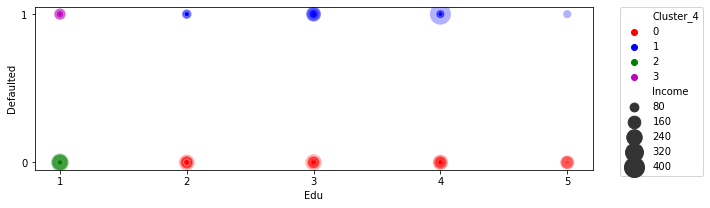

In [29]:
fig, ax = plt.subplots(figsize=(10, 3))

sns.scatterplot(x=df.Edu, 
                y=df.Defaulted, 
                size=df.Income, 
                sizes=(10, 450), 
                hue=df.Cluster_4, 
                palette=['r', 'b', 'g', 'm'], 
                alpha=0.3,
                ax=ax)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#### 2-D: `Edu` / `Years Employed` / `Defaulted`

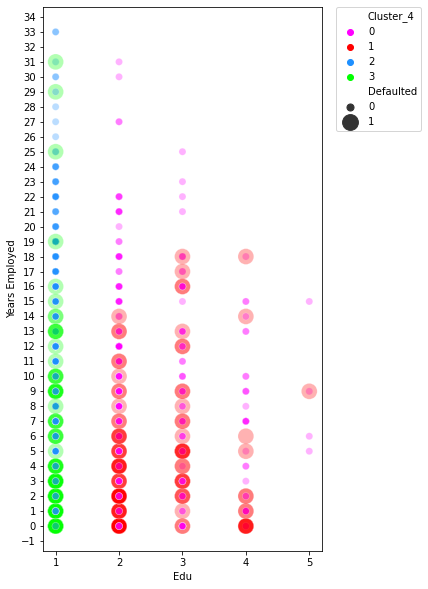

In [30]:
fig, ax = plt.subplots(figsize=(5, 10))

sns.scatterplot(x=df.Edu, 
                y=df['Years Employed'], #df.Defaulted, 
                size=df.Defaulted, 
                sizes=(250, 50), 
                hue=df.Cluster_4, 
                palette=['fuchsia', 'r', 'dodgerblue', 'lime'], 
                alpha=0.3,
                ax=ax)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#### 3-D

In [31]:
%matplotlib widget
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig, azim=-45, elev=25)


ax.scatter(df.Edu, df.Defaulted, df.Income, 
           c=df.Cluster_4,
           alpha=0.5, 
           s=50)

ax.set_xlabel('Education')
ax.set_ylabel('Defaulted')
ax.set_zlabel('Income')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 0, 'Income')

In [32]:
%matplotlib inline

## Построение модели (5 кластеров)

In [33]:
from sklearn.cluster import KMeans

k_means_5 = KMeans(init = "k-means++", n_clusters = 5, n_init = 12)
k_means_5.fit(df_norm)

n_clusters_5 = k_means_5.n_clusters

labels_5 = k_means_5.labels_

## Анализ результатов (7 кластеров)

### 3-D PCA

In [34]:
%matplotlib widget
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig, azim=-110, elev=20)


ax.scatter(df_pca_3[0], df_pca_3[1], df_pca_3[2], 
           c=labels_5, 
           alpha=0.3)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [35]:
%matplotlib inline

### 3-D UMAP

In [47]:
%matplotlib widget

from mpl_toolkits.mplot3d.axes3d import Axes3D    
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig, azim=130, elev=35)

ax.scatter(df_umap_3[0], df_umap_3[1], df_umap_3[2], 
           c=labels_5, 
           alpha=0.3)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [37]:
%matplotlib inline

### Анализ "представителей" кластеров

In [38]:
df["Cluster_5"] = labels_5
df

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio,Cluster_4,Cluster_5
Customer Id,,,,,,,,,,,
1,41,2,6,19,0.124,1.073,0,NBA001,6.3,0,2
2,47,1,26,100,4.582,8.218,0,NBA021,12.8,2,0
3,33,2,10,57,6.111,5.802,1,NBA013,20.9,1,1
4,29,2,4,19,0.681,0.516,0,NBA009,6.3,0,2
5,47,1,31,253,9.308,8.908,0,NBA008,7.2,2,0
...,...,...,...,...,...,...,...,...,...,...,...
846,27,1,5,26,0.548,1.220,0,NBA007,6.8,2,4
847,28,2,7,34,0.359,2.021,0,NBA002,7.0,0,2
848,25,4,0,18,2.802,3.210,1,NBA001,33.4,1,1


In [39]:
df.groupby('Cluster_5').mean().round(2)

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Cluster_4
Cluster_5,,,,,,,,,
0,40.18,1.00,15.68,62.96,2.16,4.36,0.0,11.27,2
1,32.66,2.59,4.62,47.66,2.42,4.29,1.0,14.09,1
2,35.62,2.53,8.54,55.71,1.47,3.17,0.0,8.69,0
3,33.47,1.00,6.03,32.72,2.43,3.30,1.0,15.57,3
4,31.94,1.00,5.90,26.57,0.53,1.29,0.0,7.40,2


In [40]:
clusters = {}

for c in range(n_clusters_5):
    clusters[c] = df[df.Cluster_5 == c]
    display(clusters[c])
    display(clusters[c].describe())
    print('\n', '=' * 100, '\n')

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio,Cluster_4,Cluster_5
Customer Id,,,,,,,,,,,
2,47,1,26,100,4.582,8.218,0,NBA021,12.8,2,0
5,47,1,31,253,9.308,8.908,0,NBA008,7.2,2,0
6,40,1,23,81,0.998,7.831,0,NBA016,10.9,2,0
14,46,1,6,30,1.415,3.865,0,NBA019,17.6,2,0
19,44,1,18,61,2.806,3.782,0,NBA000,10.8,2,0
...,...,...,...,...,...,...,...,...,...,...,...
809,45,1,17,62,2.437,6.863,0,NBA000,15.0,2,0
820,36,1,7,40,1.695,2.265,0,NBA017,9.9,2,0
822,32,1,16,38,0.694,7.286,0,NBA010,21.0,2,0


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Cluster_4,Cluster_5
count,167.000000,167.0,167.000000,167.000000,167.000000,167.000000,167.0,167.000000,167.0,167.0
mean,40.179641,1.0,15.682635,62.958084,2.163383,4.359545,0.0,11.271856,2.0,0.0
std,6.458678,0.0,6.072940,41.312409,1.949719,3.804418,0.0,6.233140,0.0,0.0
min,27.000000,1.0,1.000000,21.000000,0.083000,0.509000,0.0,1.900000,2.0,0.0
25%,35.000000,1.0,11.000000,40.000000,0.907500,2.160000,0.0,7.000000,2.0,0.0
50%,39.000000,1.0,16.000000,53.000000,1.617000,3.369000,0.0,10.100000,2.0,0.0
75%,45.000000,1.0,19.000000,72.000000,2.678000,5.188500,0.0,14.650000,2.0,0.0
max,56.000000,1.0,33.000000,324.000000,13.553000,35.197000,0.0,32.500000,2.0,0.0


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio,Cluster_4,Cluster_5
Customer Id,,,,,,,,,,,
3,33,2,10,57,6.111,5.802,1,NBA013,20.9,1,1
11,44,3,8,88,0.285,5.083,1,NBA010,6.1,1,1
15,28,3,2,20,0.233,1.647,1,NBA000,9.4,1,1
23,28,3,6,47,5.574,3.732,1,NBA008,19.8,1,1
33,23,2,0,42,1.019,0.619,1,NBA001,3.9,1,1
...,...,...,...,...,...,...,...,...,...,...,...
797,25,4,0,24,1.597,1.307,1,NBA006,12.1,1,1
817,36,2,6,27,0.262,0.980,1,NBA015,4.6,1,1
824,27,4,0,25,1.419,1.756,1,NBA000,12.7,1,1


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Cluster_4,Cluster_5
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.0,104.000000,104.0,104.0
mean,32.663462,2.586538,4.615385,47.663462,2.422279,4.287221,1.0,14.088462,1.0,1.0
std,7.836448,0.758263,4.653650,52.537109,2.908140,4.689026,0.0,7.407701,0.0,0.0
min,21.000000,2.000000,0.000000,15.000000,0.118000,0.161000,1.0,0.900000,1.0,1.0
25%,27.000000,2.000000,1.000000,24.000000,0.480750,1.459000,1.0,8.475000,1.0,1.0
50%,31.000000,2.000000,3.000000,33.000000,1.446000,2.711000,1.0,13.450000,1.0,1.0
75%,39.000000,3.000000,6.250000,52.750000,3.059000,5.071750,1.0,18.475000,1.0,1.0
max,53.000000,5.000000,18.000000,446.000000,16.031000,27.034000,1.0,36.600000,1.0,1.0


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio,Cluster_4,Cluster_5
Customer Id,,,,,,,,,,,
1,41,2,6,19,0.124,1.073,0,NBA001,6.3,0,2
4,29,2,4,19,0.681,0.516,0,NBA009,6.3,0,2
7,38,2,4,56,0.442,0.454,0,NBA013,1.6,0,2
8,42,3,0,64,0.279,3.945,0,NBA009,6.6,0,2
10,47,3,23,115,0.653,3.947,0,NBA011,4.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...
837,23,2,3,24,0.552,0.960,0,NBA004,6.3,0,2
841,38,3,13,25,0.343,1.082,0,NBA018,5.7,0,2
842,29,3,7,63,0.572,2.893,0,NBA001,5.5,0,2


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Cluster_4,Cluster_5
count,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.0,286.000000,286.0,286.0
mean,35.622378,2.534965,8.541958,55.706294,1.472444,3.165122,0.0,8.685315,0.0,2.0
std,8.071004,0.761232,6.441368,40.263576,1.704603,3.176850,0.0,5.656841,0.0,0.0
min,20.000000,2.000000,0.000000,14.000000,0.015000,0.053000,0.0,0.100000,0.0,2.0
25%,29.000000,2.000000,3.000000,28.000000,0.403500,1.021000,0.0,4.400000,0.0,2.0
50%,35.000000,2.000000,8.000000,43.000000,0.891500,2.067000,0.0,7.550000,0.0,2.0
75%,41.000000,3.000000,12.000000,68.750000,1.839750,4.272250,0.0,12.175000,0.0,2.0
max,54.000000,5.000000,31.000000,266.000000,9.877000,18.269000,0.0,32.400000,0.0,2.0


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio,Cluster_4,Cluster_5
Customer Id,,,,,,,,,,,
38,37,1,0,18,1.584,0.738,1,NBA018,12.9,3,3
41,20,1,4,14,0.201,1.157,1,NBA000,9.7,3,3
53,24,1,3,19,1.358,3.278,1,NBA004,24.4,3,3
56,34,1,2,25,0.573,2.577,1,NBA011,12.6,3,3
57,32,1,1,20,0.315,0.645,1,NBA000,4.8,3,3
...,...,...,...,...,...,...,...,...,...,...,...
803,26,1,0,14,0.302,0.748,1,NBA000,7.5,3,3
810,22,1,4,19,1.887,2.502,1,NBA003,23.1,3,3
814,31,1,10,49,3.237,1.565,1,NBA012,9.8,3,3


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Cluster_4,Cluster_5
count,79.000000,79.0,79.000000,79.000000,79.000000,79.000000,79.0,79.000000,79.0,79.0
mean,33.468354,1.0,6.025316,32.721519,2.425937,3.304101,1.0,15.569620,3.0,3.0
std,9.371035,0.0,6.476733,23.753508,3.634974,3.581543,0.0,8.485392,0.0,0.0
min,20.000000,1.0,0.000000,14.000000,0.073000,0.182000,1.0,2.100000,3.0,3.0
25%,26.000000,1.0,1.000000,19.000000,0.569000,1.000000,1.0,9.300000,3.0,3.0
50%,31.000000,1.0,4.000000,24.000000,1.370000,2.350000,1.0,14.800000,3.0,3.0
75%,38.500000,1.0,9.000000,39.500000,2.514500,3.661500,1.0,22.200000,3.0,3.0
max,55.000000,1.0,31.000000,136.000000,20.561000,17.204000,1.0,41.300000,3.0,3.0


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio,Cluster_4,Cluster_5
Customer Id,,,,,,,,,,,
9,26,1,5,18,0.575,2.215,0,NBA006,15.5,2,4
13,24,1,7,18,0.526,0.643,0,NBA000,6.5,2,4
16,24,1,1,16,0.185,1.287,0,NBA005,9.2,2,4
17,29,1,1,17,0.132,0.293,0,NBA004,2.5,2,4
27,24,1,4,21,0.099,0.447,0,NBA002,2.6,2,4
...,...,...,...,...,...,...,...,...,...,...,...
840,31,1,8,22,0.370,1.104,0,NBA001,6.7,2,4
843,32,1,14,36,0.273,0.591,0,NBA000,2.4,2,4
845,41,1,7,43,0.694,1.198,0,NBA011,4.4,2,4


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Cluster_4,Cluster_5
count,214.000000,214.0,214.000000,214.000000,214.000000,214.000000,214.0,214.000000,214.0,214.0
mean,31.943925,1.0,5.901869,26.570093,0.534238,1.293425,0.0,7.403271,2.0,4.0
std,6.461634,0.0,4.020452,9.194928,0.491520,0.837173,0.0,4.904758,0.0,0.0
min,21.000000,1.0,0.000000,13.000000,0.012000,0.046000,0.0,0.400000,2.0,4.0
25%,27.000000,1.0,3.000000,21.000000,0.176000,0.672500,0.0,4.100000,2.0,4.0
50%,31.000000,1.0,5.000000,24.500000,0.402500,1.140000,0.0,6.450000,2.0,4.0
75%,36.000000,1.0,8.000000,31.000000,0.759250,1.733250,0.0,9.700000,2.0,4.0
max,50.000000,1.0,17.000000,89.000000,3.065000,5.032000,0.0,32.300000,2.0,4.0


#### 2-D

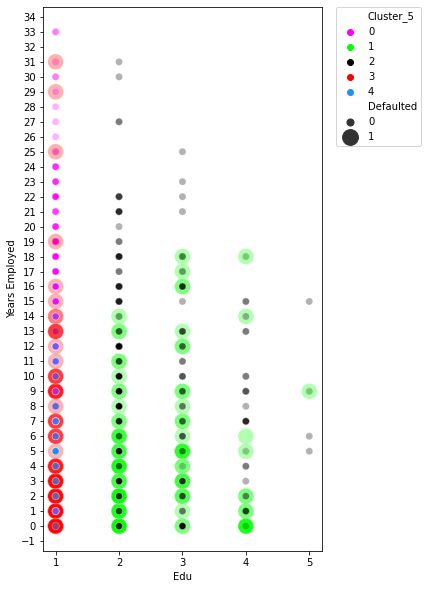

In [41]:
fig, ax = plt.subplots(figsize=(5, 10))

sns.scatterplot(x=df.Edu, 
                y=df['Years Employed'], #df.Defaulted, 
                size=df.Defaulted, 
                sizes=(250, 50), 
                hue=df.Cluster_5, 
                palette=['fuchsia', 'lime', 'k', 'r', 'dodgerblue'], 
                alpha=0.3,
                ax=ax)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#### 3-D

In [48]:
%matplotlib widget
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig, azim=35, elev=10)


ax.scatter(df.Edu, df.Defaulted, df['Years Employed'], 
           c=df.Cluster_5,
           alpha=0.3, 
           s=50)

ax.set_xlabel('Education')
ax.set_ylabel('Defaulted')
ax.set_zlabel('Years Employed')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 0, 'Years Employed')

In [49]:
%matplotlib inline